### Quantum Hamiltonian Simulation
Quantum Hamiltonian Simulation is a critical concept in quantum computing, focused on simulating the time evolution of quantum systems. This process is governed by the Hamiltonian, which encapsulates the total energy of the system. The ability to simulate Hamiltonians efficiently on a quantum computer is pivotal for understanding complex quantum systems, from molecular interactions to novel materials, and it has the potential to revolutionize fields like quantum chemistry and condensed matter physics.

Hamiltonian simulation leverages quantum circuits to approximate the time evolution of a quantum state under a given Hamiltonian. This is typically done using a technique known as Trotterization or Trotter-Suzuki decomposition, which breaks down the exponential of a sum of non-commuting operators into a product of exponentials of the individual operators. This approach is particularly useful when dealing with Hamiltonians that can be expressed as a sum of simpler terms, each corresponding to specific physical interactions within the system.

Quantum Hamiltonian simulation has wide-reaching implications. In quantum chemistry, it can be used to predict molecular energies and reaction rates, which are crucial for drug discovery and material design. In condensed matter physics, Hamiltonian simulation can help in understanding phenomena like superconductivity and topological phases of matter. Additionally, it plays a significant role in quantum error correction, where understanding the dynamics of quantum errors is necessary for developing robust quantum algorithms.

Despite its potential, Hamiltonian simulation is computationally demanding, requiring precise control over quantum gates and long coherence times. However, ongoing advancements in quantum algorithms and hardware are steadily overcoming these challenges, bringing practical quantum Hamiltonian simulation closer to reality.



#### Mathematical Formulation

##### Rotation Gates
$$
R_x(\theta) = \exp\left(-i \frac{\theta}{2} X \right) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_z(\theta) = \exp\left(-i \frac{\theta}{2} Z \right) = \begin{pmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{pmatrix}
$$

##### Hamiltonian Evolution
$$
U(t) = \exp\left(-iHt\right)
$$

For the Hamiltonian $H = \theta X + \theta Z$, the Trotterized time evolution is:
$$
U(t) \approx \left[R_x\left(\frac{2\theta t}{n}\right) R_z\left(\frac{2\theta t}{n}\right)\right]^n
$$

##### Bloch Sphere Representation
$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle
$$


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import StatevectorSimulator 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Define the Hamiltonian parameters
theta = np.pi / 4  # Rotation angle
time = 1  # Time evolution
steps = 10  # Trotterization steps

In [3]:
# Initialize a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

In [4]:
# Define the Hamiltonian evolution using Trotterization
for _ in range(steps):
    qc.rx(2 * theta * time / steps, 0)  # Apply rotation around x-axis
    qc.rz(2 * theta * time / steps, 0)  # Apply rotation around z-axis

In [5]:
# Measure the qubit
qc.measure(0, 0)

Quantum Circuit before compilation:


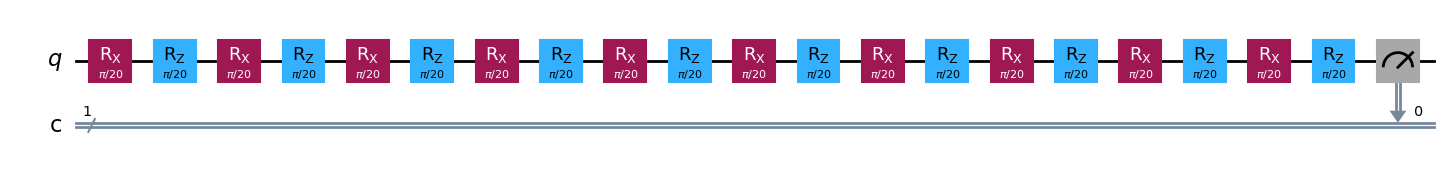

In [6]:
# Draw the quantum circuit before compilation
print("Quantum Circuit before compilation:")
qc.draw('mpl')
plt.show()

In [7]:
# Choose the StatevectorSimulator
simulator = StatevectorSimulator()

In [8]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)


Quantum Circuit after compilation:


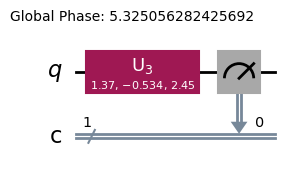

In [9]:
# Draw the quantum circuit after compilation
print("\nQuantum Circuit after compilation:")
compiled_circuit.draw('mpl')
plt.show()

In [10]:
# Simulate the circuit
result = simulator.run(compiled_circuit, shots=1000).result()

In [11]:
# Extract statevector and counts
statevector = result.get_statevector()
counts = result.get_counts()

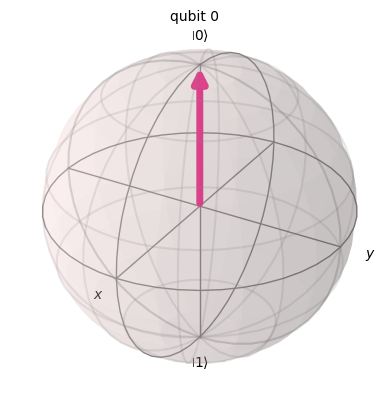

In [12]:
# Plot the Bloch sphere if statevector is available
plot_bloch_multivector(statevector)
plt.show()

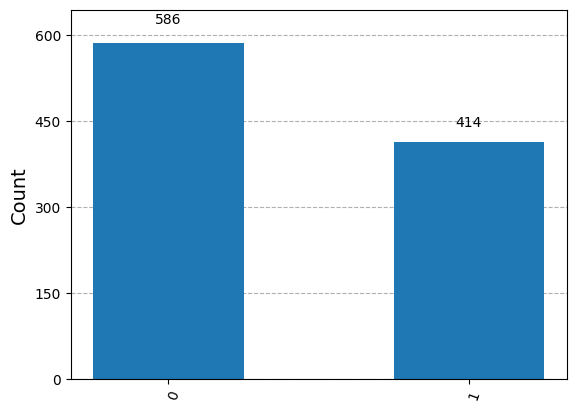

In [13]:
# Plot the histogram of measurement outcomes
plot_histogram(counts)
plt.show()